In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# %matplotlib inline
# %config InlineBackend.figure_formats = ['svg']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [ ]:
income = pd.read_csv('income.csv')
income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
income.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [ ]:
#features = ['age', 'gender','hoursperweek']

In [ ]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1),
        drop_first=True,
        dtype = 'int'
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = income_model_prep(income)

In [ ]:
# def probability(m:'int', n:'int') -> 'float64':
#   probability_value = m/(m+n)
#   return probability_value

In [ ]:
# def entropy(p:'float64') -> 'float64':
#   entropy_value = -np.log2(np.power(p,p)) - np.log2(np.power(1-p,1-p))
#   return entropy_value
#   #return f"the entropy of {p:0.3f} is : {entropy_value:0.3f}"

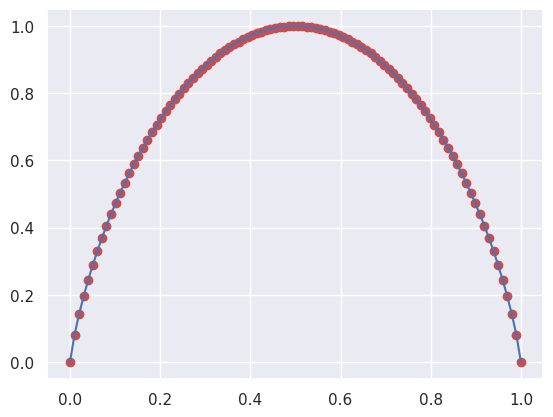

In [ ]:
# x = np.linspace(0,1,100)
# y = [entropy(t) for t in x]
# plt.plot(x,y, 'ro')
# plt.plot(x,y, 'b-')
# plt.show()

In [ ]:
# q = probability(1,2)
# q , entropy(q)

(0.3333333333333333, 'the entropy of 0.333 is : 0.918')

# Assignment 1: Simple Tree

1. Build a decision tree with max_depth 3 using the `age`, `hoursperweek` and `gender` features.
2. Calculate accuracy and build a confusion matrix for the test data
3. Plot the tree - which group has the highest probability of making over 50,000?
4. Plot Feature importance - which variable was most important? Are there any we can drop?

In [ ]:
#features = ['age', 'hoursperweek', 'gender']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3)
dt_model = dt.fit(X_train, y_train)

In [ ]:
dt_evaluation_metrics = pd.DataFrame({"Training Data": f"{dt_model.score(X_train,y_train):0.2f}",
                                      "Test Data": f"{dt_model.score(X_test,y_test):0.2f}"
                                      }, index = ['Accuracy Score'])
dt_evaluation_metrics
#dt_evaluation_metrics.round(2)

,Training Data,Test Data
Accuracy Score,0.82,0.82


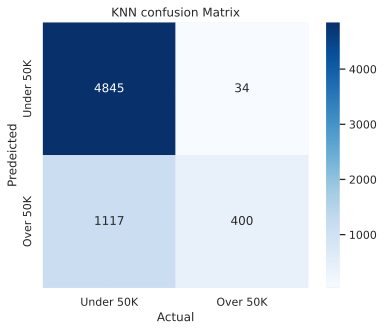

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, dt_model.predict(X_test)),
            annot = True,
            cmap = "Blues",
            fmt = 'g',
            square = True,
            xticklabels = ['Under 50K','Over 50K'],
            yticklabels = ['Under 50K','Over 50K']
            ).set(
                xlabel = "Actual",
                ylabel = "Predeicted",
                title = "KNN confusion Matrix"
            )
plt.show()

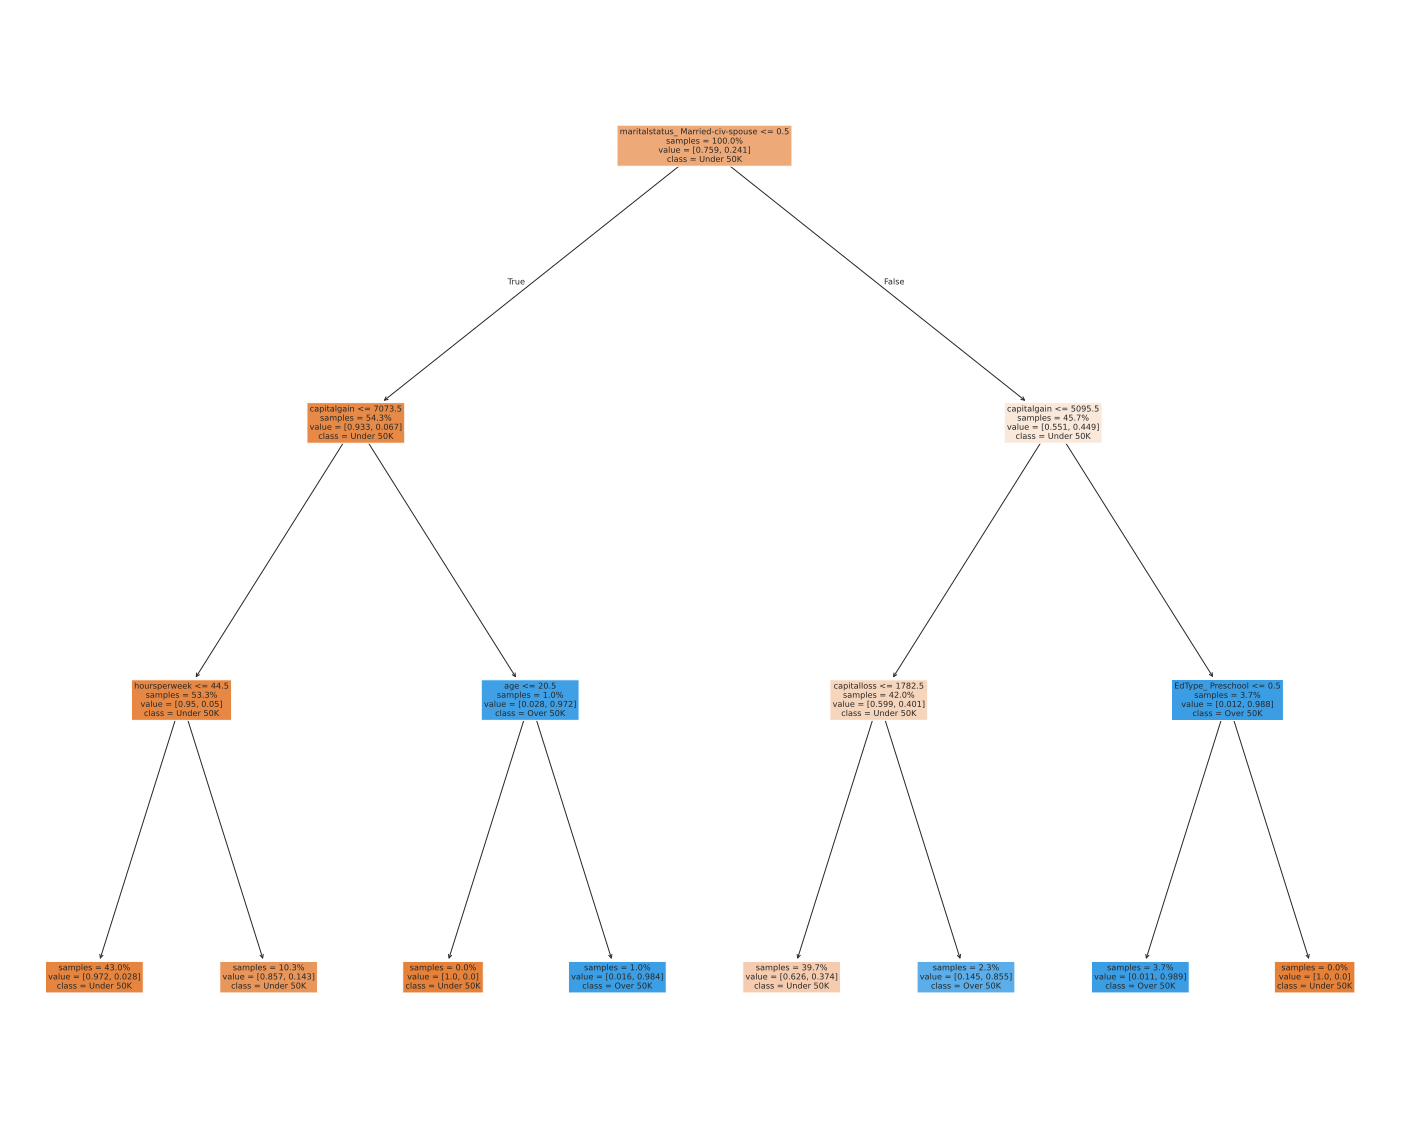

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25,20))

plot_tree(
    dt_model,
    feature_names = X_test.columns.to_list(),
    class_names = ['Under 50K','Over 50K'],
    impurity = False,
    proportion = True,
    filled = True
)
plt.show()

In [ ]:
dt_model.feature_importances_.shape

(94,)

In [ ]:
important_features = pd.DataFrame({'feature': X_train.columns ,
                                   'importance': dt_model.feature_importances_}).sort_values('importance', ascending = False)
important_features.loc[:10]

,feature,importance
27,maritalstatus_ Married-civ-spouse,0.578502
1,capitalgain,0.319842
2,capitalloss,0.081804
3,hoursperweek,0.017443
0,age,0.001796
23,EdType_ Preschool,0.000612
6,JobType_ Private,0.000000
7,JobType_ Self-emp-inc,0.000000
8,JobType_ Self-emp-not-inc,0.000000
9,JobType_ State-gov,0.000000


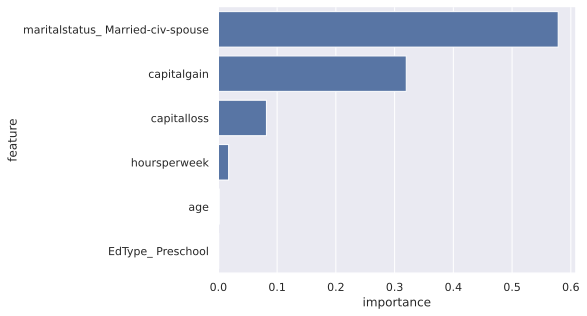

In [ ]:
sns.barplot(important_features[:6] , x = 'importance', y = 'feature')
sns.despine()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_featured = pd.get_dummies(income[features], drop_first=True, dtype = 'int')
# y_new = np.where(income["SalStat"] == " less than or equal to 50,000", 0, 1) # Removed the comma to make y_new an array
# X_train_f , X_test_f, y_train_f, y_test_f = train_test_split(X_featured, y_new,test_size = 0.2, random_state = 2026)

In [ ]:
# dt_model_new = dt.fit(X_train_f,y_train_f)

In [ ]:
# dt_evaluation_metrics_new = pd.DataFrame({"Training Data": f"{dt_model.score(X_train_f,y_train_f):0.2f}",
#                                       "Test Data": f"{dt_model.score(X_test_f,y_test_f):0.2f}"
#                                       }, index = ['Accuracy Score'])
# dt_evaluation_metrics_new
# #dt_evaluation_metrics.round(2)

In [ ]:
# from sklearn.metrics import confusion_matrix
# sns.heatmap(confusion_matrix(y_test_f, dt_model_new.predict(X_test_f)),
#             annot = True,
#             cmap = "Reds",
#             fmt = 'g',
#             square = True,
#             xticklabels = ['Under 50K','Over 50K'],
#             yticklabels = ['Under 50K','Over 50K']
#             ).set(
#                 xlabel = "Actual",
#                 ylabel = "Predeicted",
#                 title = "KNN confusion Matrix"
#             )
# plt.show()

In [ ]:
# from sklearn.tree import plot_tree
# fig = plt.figure(figsize = (25,20))

# plot_tree(
#     dt_model,
#     feature_names = X_test_f.columns.to_list(),
#     class_names = ['Under 50K','Over 50K'],
#     impurity = False,
#     proportion = True,
#     filled = True
# )
# plt.show()

# Assignment 2: Hyperparameter Tuning

1. Use cross validation to find the optimal tree parameters. Your process should evaluate different values of max_depth, 'min_samples_leaf', and 'criterion'.
2. Generate a confusion matrix and report test accuracy, precision, and recall

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , precision_score , recall_score

In [ ]:
params = {'max_depth': [2,5,10,15,20] ,
          'min_samples_leaf': [2,5,10,15,20] ,
          'criterion': ['entropy', 'gini', 'log_loss']
          }
grid_dt = GridSearchCV(DecisionTreeClassifier(), params)
grid_dt_model = grid_dt.fit(X_train , y_train)
grid_dt_model.best_params_


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [ ]:
tunned_dt = DecisionTreeClassifier(**grid_dt_model.best_params_)
tunned_dt_model = tunned_dt.fit(X_train, y_train)

In [ ]:
tunned_dt_performance = pd.DataFrame({'Accuray': [accuracy_score(y_train , tunned_dt_model.predict(X_train)),
                                                  accuracy_score(y_test , tunned_dt_model.predict(X_test))],
                                      'Precision':[precision_score(y_train , tunned_dt_model.predict(X_train)),
                                                   precision_score(y_test , tunned_dt_model.predict(X_test))],
                                      'Recall' : [recall_score(y_train , tunned_dt_model.predict(X_train)),
                                                  recall_score(y_test , tunned_dt_model.predict(X_test))]
                                      }, index = ['X_train & y_train', 'X_test & y_test'])
tunned_dt_performance.round(3)

,Accuray,Precision,Recall
X_train & y_train,0.868,0.778,0.635
X_test & y_test,0.856,0.753,0.586


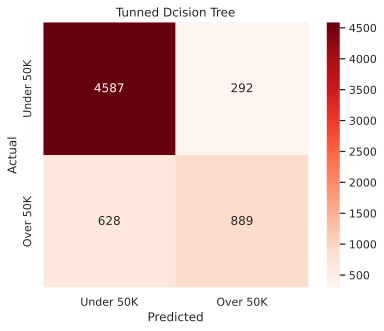

In [ ]:
sns.heatmap(confusion_matrix(y_test, tunned_dt_model.predict(X_test)),
            annot = True,
            cmap = 'Reds',
            fmt = 'g',
            square = True,
            xticklabels = ['Under 50K', 'Over 50K'],
            yticklabels = ['Under 50K', 'Over 50K']
            ).set(
                xlabel = 'Predicted',
                ylabel = 'Actual',
                title = 'Tunned Dcision Tree'
            )
sns.despine()

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25,20))

plot_tree(
    tunned_dt_model,
    feature_names = X_test.columns.to_list(),
    class_names = ['Under 50K','Over 50K'],
    impurity = False,
    proportion = True,
    filled = True
)
plt.show()